# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.

In [1]:
signNames = []
signNames.append("Speed limit (20km/h)")
signNames.append("Speed limit (30km/h)")
signNames.append("Speed limit (50km/h)")
signNames.append("Speed limit (60km/h)")
signNames.append("Speed limit (70km/h)")
signNames.append("Speed limit (80km/h)")
signNames.append("End of speed limit (80km/h)")
signNames.append("Speed limit (100km/h)")
signNames.append("Speed limit (120km/h)")
signNames.append("No passing")
signNames.append("No passing for vehicles over 3.5 metric tons")
signNames.append("Right-of-way at the next intersection")
signNames.append("Priority road")
signNames.append("Yield")
signNames.append("Stop")
signNames.append("No vehicles")
signNames.append("Vehicles over 3.5 metric tons prohibited")
signNames.append("No entry")
signNames.append("General caution")
signNames.append("Dangerous curve to the left")
signNames.append("Dangerous curve to the right")
signNames.append("Double curve")
signNames.append("Bumpy road")
signNames.append("Slippery road")
signNames.append("Road narrows on the right")
signNames.append("Road work")
signNames.append("Traffic signals")
signNames.append("Pedestrians")
signNames.append("Children crossing")
signNames.append("Bicycles crossing")
signNames.append("Beware of ice/snow")
signNames.append("Wild animals crossing")
signNames.append("End of all speed and passing limits")
signNames.append("Turn right ahead")
signNames.append("Turn left ahead")
signNames.append("Ahead only")
signNames.append("Go straight or right")
signNames.append("Go straight or left")
signNames.append("Keep right")
signNames.append("Keep left")
signNames.append("Roundabout mandatory")
signNames.append("End of no passing")
signNames.append("End of no passing by vehicles over 3.5 metric tons")

---
## Step 0: Load The Data

In [2]:
import pickle

training_file = 'traffic-signs-data/train.p'
validation_file = 'traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**\

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
import numpy as np

n_train = len(X_train)
n_validation = len(X_valid)
n_test = len(X_test)
image_shape = np.shape(X_train[0])
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

26
Traffic signals


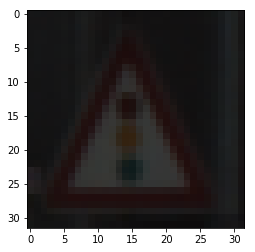

In [7]:
import matplotlib.pyplot as plt
import random

# see a random image from the training set

%matplotlib inline
index = random.randint(0,len(X_train))
plt.figure()
plt.imshow(X_train[index])
print(y_train[index])
print(signNames[y_train[index]])
plt.figure()

Train Data


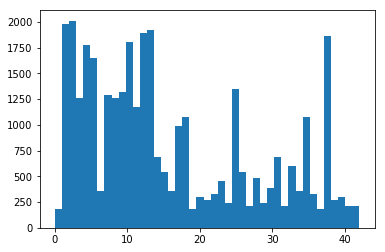

In [8]:
plt.hist(y_train, bins=43)
print("Train Data")

Validation Data


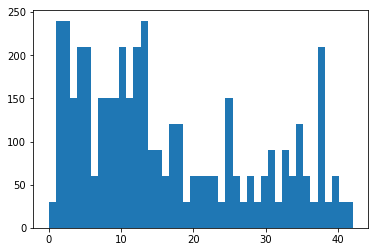

In [9]:
plt.hist(y_valid, bins=43)
print("Validation Data")

Test Data


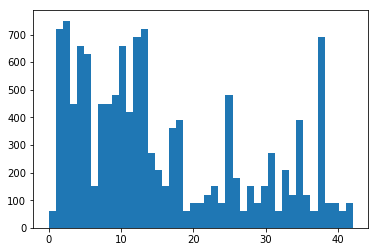

In [10]:
plt.hist(y_test, bins=43)
print("Test Data")

In [11]:
# dominate colors for each sign type
for i in range(43):
    indices = np.where(y_train == i)[0]
    pixelSum = 0    
    colors = [0, 0, 0]
    for index in indices:
        pixelSum += np.sum(X_train[index])
        colors += np.sum(np.sum(X_train[index], axis=0), axis=0)
    pixelSum /= len(indices)
    colors /= len(indices)
    print('{:.<52}'.format(signNames[i]), int(pixelSum), colors.astype(int))

Speed limit (20km/h)................................ 398137 [146160 127467 124509]
Speed limit (30km/h)................................ 328939 [119700 104886 104352]
Speed limit (50km/h)................................ 281139 [104477  90484  86178]
Speed limit (60km/h)................................ 209766 [72227 67498 70040]
Speed limit (70km/h)................................ 223037 [80951 71142 70943]
Speed limit (80km/h)................................ 180081 [61885 57364 60831]
End of speed limit (80km/h)......................... 126201 [41792 41338 43069]
Speed limit (100km/h)............................... 181965 [63268 57902 60794]
Speed limit (120km/h)............................... 156047 [54046 48775 53226]
No passing.......................................... 300414 [110981  95263  94169]
No passing for vehicles over 3.5 metric tons........ 154386 [53943 48371 52072]
Right-of-way at the next intersection............... 278437 [99142 89577 89718]
Priority road...............

----

## Step 2: Design and Test a Model Architecture

### Pre-process the Data Set (normalization, and data augmentation)

In [12]:
from scipy.ndimage import rotate
import random

def addRotatedImage(array,image):
    newImage = rotate(image,random.randint(-20,20),reshape=False)
    array.append(newImage)

In [13]:
from collections import Counter

rotated_x_train = []
rotated_y_train = []

counts = Counter(y_train).most_common()
biggestCount = counts[0][1]

for i in range(len(counts)-1,-1,-1):
    index = counts[i][0]
    indices = np.where(y_train == index)[0]
    for j in range(biggestCount - counts[i][1]):
        index = indices[random.randint(0,len(indices)-1)]
        addRotatedImage(rotated_x_train, X_train[index])
        rotated_y_train.append(y_train[index])

In [14]:
X_train = np.append(X_train, rotated_x_train, axis=0)
y_train = np.append(y_train, rotated_y_train, axis=0)

Train Data


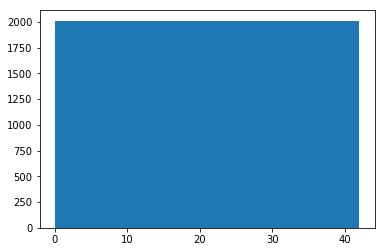

In [15]:
plt.hist(y_train, bins=43)
print("Train Data")

In [16]:
def preProcess(images):
    #grayImages = np.array([cv2.cvtColor(x, cv2.COLOR_RGB2GRAY)[:, :, np.newaxis] for x in images])
    #comboImages = addGrayToColor(images, grayImages)
    processedImages = (images - [128])/128
    return processedImages

In [17]:
X_train_processed = preProcess(X_train)
X_valid_processed = preProcess(X_valid)
X_test_processed  = preProcess(X_test)

In [18]:
# check to make sure the processed numbers look right

index1 = random.randint(0,len(X_train)-1)
index2 = random.randint(0,len(X_train[index1])-1)
index3 = random.randint(0,len(X_train[index1][index2])-1)
index4 = random.randint(0,len(X_train[index1][index2][index3])-1)

print(X_train[index1][index2][index3])
print(X_train_processed[index1][index2][index3])

[35 38 29]
[-0.7265625 -0.703125  -0.7734375]


### Model Architecture

In [19]:
import tensorflow as tf

In [20]:
def convolutionLayer(inputLayer, inputShape, outputShape, mu, sigma, keep_prob):
    
    convSize=inputShape[0]-outputShape[0]+1
    
    weights = tf.Variable(tf.truncated_normal(
        shape=(convSize, convSize, inputShape[2], outputShape[2]), mean = mu, stddev = sigma))
    bias = tf.Variable(tf.zeros(outputShape[2]))
    
    layer = tf.nn.conv2d(inputLayer, weights, strides=[1, 1, 1, 1], padding='VALID') + bias
    return tf.nn.dropout(layer, keep_prob)

def activationLayer(inputLayer, keep_prob):
    layer = tf.nn.relu(inputLayer)
    return tf.nn.dropout(layer, keep_prob)

def poolingLayer(inputLayer, inputShape, outputShape):
    strideSize = inputShape[0]/outputShape[0]
    return tf.nn.max_pool(inputLayer, 
        ksize=[1, strideSize, strideSize, 1], strides=[1, strideSize, strideSize, 1], padding='VALID')

def fullyConnectedLayer(inputLayer, inputShape, outputShape, mu, sigma, keep_prob):
    weights = tf.Variable(tf.truncated_normal(shape=(inputShape, outputShape), mean = mu, stddev = sigma))
    bias = tf.Variable(tf.zeros(outputShape))
    layer = tf.matmul(inputLayer, weights) + bias
    return tf.nn.dropout(layer, keep_prob)

In [21]:
from tensorflow.contrib.layers import flatten

def LeNet(x, keep_prob_conv, keep_prob_fullConn):    
    mu = 0
    sigma = 0.1
    
    inputShape=(32, 32, 3)
    outputShape=(28, 28, 16)
    
    conv1 = convolutionLayer(x, inputShape, outputShape, mu, sigma, 1)
    conv1 = activationLayer(conv1, keep_prob_conv)
    inputShape = outputShape
    outputShape = (14, 14, inputShape[2])
    conv1 = poolingLayer(conv1, inputShape, outputShape)

    inputShape = outputShape
    outputShape = (10, 10, 32)
    conv2 = convolutionLayer(conv1, inputShape, outputShape, mu, sigma, 1)
    conv2 = activationLayer(conv2, keep_prob_conv)
    inputShape = outputShape
    outputShape = (5, 5, inputShape[2])
    conv2 = poolingLayer(conv2, inputShape, outputShape)

    inputShape = outputShape
    outputShape = inputShape[0]*inputShape[1]*inputShape[2]
    fc0 = flatten(conv2)
    
    inputShape = outputShape
    outputShape = 120
    fc1 = fullyConnectedLayer(fc0, inputShape, outputShape, mu, sigma, 1)
    fc1 = activationLayer(fc1, keep_prob_fullConn)

    inputShape = outputShape
    outputShape = 84
    fc2 = fullyConnectedLayer(fc1, inputShape, outputShape, mu, sigma, 1)
    fc2 = activationLayer(fc2, keep_prob_fullConn)

    inputShape = outputShape
    outputShape = 43
    logits = fullyConnectedLayer(fc2, inputShape, outputShape, mu, sigma, 1)
    
    return logits

### Train, Validate and Test the Model

In [22]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob_conv = tf.placeholder(tf.float32)
keep_prob_fullConn = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

In [23]:
rate = 0.001
logits = LeNet(x, keep_prob_conv, keep_prob_fullConn)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [24]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, 
                                                           keep_prob_conv: 1.0, keep_prob_fullConn: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [25]:
EPOCHS = 7
BATCH_SIZE = 128

In [26]:
from sklearn.utils import shuffle

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_processed)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_processed, X_train, y_train = shuffle(X_train_processed, X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_processed[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, 
                                                    keep_prob_conv: 0.8, keep_prob_fullConn: 0.5})
            
        print("EPOCH {} ...".format(i+1))
        
        train_accuracy = evaluate(X_train_processed, y_train)
        print("Train Accuracy = {:.3f}".format(train_accuracy))
        validation_accuracy = evaluate(X_valid_processed, y_valid)
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Train Accuracy = 0.883
Validation Accuracy = 0.823

EPOCH 2 ...
Train Accuracy = 0.961
Validation Accuracy = 0.921

EPOCH 3 ...
Train Accuracy = 0.971
Validation Accuracy = 0.927

EPOCH 4 ...
Train Accuracy = 0.985
Validation Accuracy = 0.945

EPOCH 5 ...
Train Accuracy = 0.989
Validation Accuracy = 0.949

EPOCH 6 ...
Train Accuracy = 0.992
Validation Accuracy = 0.958

EPOCH 7 ...
Train Accuracy = 0.991
Validation Accuracy = 0.955

Model saved


In [45]:
with tf.Session() as sess:
    saver.restore(sess, './lenet')
    
    accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(accuracy))
    print()

Test Accuracy = 0.917



---

## Step 3: Test a Model on New Images

### Load and Output the Images

In [47]:
internetImages = []
internetAnswers = []

In [48]:
import matplotlib.image as mpimg
import cv2

def make32By32(image):
    dim = (32, 32)
    return cv2.resize(image, dim, interpolation = cv2.INTER_AREA)

def printImage(image):
    plt.figure()
    plt.imshow(image)

def addToAnswers(image,signName):
    internetImages.append(image)
    internetAnswers.append(signNames.index(signName))
    
def removeGrayScale(image):
    newImage = []
    for i in image:
        row = []
        for j in i:
            pixel = [j[0], j[1], j[2]]
            row.append(pixel)
        newImage.append(row)
    return newImage

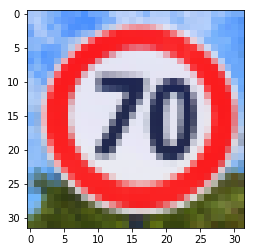

In [49]:
image = mpimg.imread('downloaded-signs/70kmh.png')
crop_image = image[95:555, 695:1155]
resized_image = make32By32(crop_image)
printImage(resized_image)
addToAnswers(resized_image, "Speed limit (70km/h)")

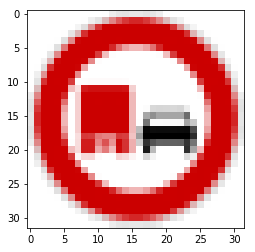

In [50]:
image = mpimg.imread('downloaded-signs/noPassingOverTons.png')
resized_image = make32By32(image)
printImage(resized_image)
addToAnswers(resized_image,  "No passing for vehicles over 3.5 metric tons")

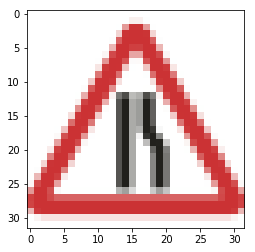

In [51]:
image = mpimg.imread('downloaded-signs/roadNarrowsOnRight.jpg')
resized_image = make32By32(image)
printImage(resized_image)
addToAnswers(resized_image, "Road narrows on the right")

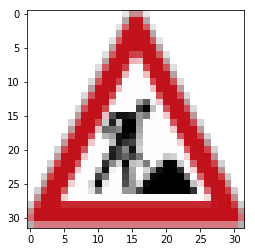

In [52]:
image = mpimg.imread('downloaded-signs/roadWork.png')
resized_image = make32By32(image)
printImage(resized_image)
addToAnswers(removeGrayScale(resized_image), "Road work")

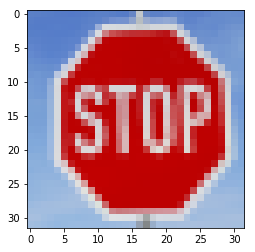

In [53]:
image = mpimg.imread('downloaded-signs/stop.png')
crop_image = image[60:250, 100:320]
resized_image = make32By32(crop_image)
printImage(resized_image)
addToAnswers(removeGrayScale(resized_image), "Stop")

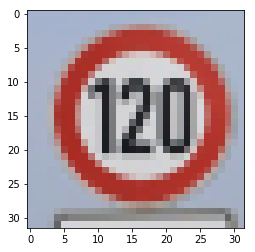

In [54]:
image = mpimg.imread('downloaded-signs/120km.jpg')
crop_image = image[10:130, 70:190]
resized_image = make32By32(crop_image)
printImage(resized_image)
addToAnswers(removeGrayScale(resized_image), "Speed limit (120km/h)")

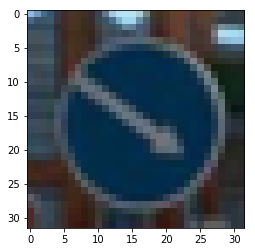

In [55]:
image = mpimg.imread('downloaded-signs/keepRight.jpg')
crop_image = image[95:135, 35:75]
resized_image = make32By32(crop_image)
printImage(resized_image)
addToAnswers(removeGrayScale(resized_image), "Keep right")

### Predict the Sign Type for Each Image

In [56]:
internetImages=np.array(internetImages)
internetAnswers=np.array(internetAnswers)
internetImages = preProcess(internetImages)

In [57]:
with tf.Session() as sess:
    saver.restore(sess, './lenet')
    test = sess.run(logits, feed_dict={x: internetImages, y: internetAnswers, keep_prob_conv: 1.0, keep_prob_fullConn: 1.0})
    test = tf.nn.softmax(test)
    test = tf.nn.top_k(test, k=1)
    answers = sess.run(test)
    
for i in range(len(internetAnswers)):
    print("correct answer: ",signNames[internetAnswers[i]])
    print("network answer: ",signNames[answers.indices[i][0]])
    print()

correct answer:  Speed limit (70km/h)
network answer:  No passing

correct answer:  No passing for vehicles over 3.5 metric tons
network answer:  No passing

correct answer:  Road narrows on the right
network answer:  General caution

correct answer:  Road work
network answer:  No passing

correct answer:  Stop
network answer:  Speed limit (70km/h)

correct answer:  Speed limit (120km/h)
network answer:  Speed limit (100km/h)

correct answer:  Keep right
network answer:  Keep right



### Analyze Performance

In [42]:
with tf.Session() as sess:
    saver.restore(sess, './lenet')
    
    accuracy = evaluate(internetImages, internetAnswers)
    print("Accuracy = {:.3f}".format(accuracy))
    print()

Accuracy = 0.143



### Output Top 5 Softmax Probabilities For Each Image Found on the Web

In [43]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

In [44]:
with tf.Session() as sess:
    saver.restore(sess, './lenet')
    test = sess.run(logits, feed_dict={x: internetImages, y: internetAnswers, keep_prob_conv: 1.0, keep_prob_fullConn: 1.0})
    test= tf.nn.softmax(test)
    test = tf.nn.top_k(test, k=5)
    answers = sess.run(test)
for i in range(len(internetAnswers)):
    print(answers.values[i])
    print([signNames[j] for j in answers.indices[i]])
    print(signNames[internetAnswers[i]])
    print()

[ 0.08597568  0.06770002  0.05896899  0.05564241  0.05450496]
['No passing', 'Speed limit (70km/h)', 'Speed limit (80km/h)', 'Dangerous curve to the left', 'No passing for vehicles over 3.5 metric tons']
Speed limit (70km/h)

[ 0.11523202  0.08628842  0.07106452  0.06783156  0.05543895]
['No passing', 'No passing for vehicles over 3.5 metric tons', 'Priority road', 'Dangerous curve to the left', 'Speed limit (80km/h)']
No passing for vehicles over 3.5 metric tons

[  9.99183953e-01   6.96034636e-04   1.16933676e-04   2.97003635e-06
   1.44595269e-08]
['General caution', 'Pedestrians', 'Traffic signals', 'Right-of-way at the next intersection', 'Road narrows on the right']
Road narrows on the right

[ 0.07887001  0.06277854  0.06196083  0.05827719  0.05124798]
['No passing', 'No passing for vehicles over 3.5 metric tons', 'Speed limit (70km/h)', 'Priority road', 'Speed limit (80km/h)']
Road work

[ 0.07825019  0.07259926  0.0683253   0.06019015  0.04978363]
['Speed limit (70km/h)', 'No 